In [1]:
import pickle
from pathlib import Path
import datetime
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns; sns.set() 
matplotlib.rc('font', **{'size': 18})
import numpy as np
import json
from pprint import pprint
import numpy as np

In [2]:
num_stations = 15

In [3]:
with open('./all_station_counts.json') as json_file:
    stat_counts = json.load(json_file)

In [4]:
pprint(stat_counts)

{'CI.CCC.': 35858,
 'CI.CLC.': 28201,
 'CI.DTP.': 35858,
 'CI.JRC2.': 35679,
 'CI.LRL.': 35858,
 'CI.MPM.': 35858,
 'CI.SLA.': 35858,
 'CI.SRT.': 35858,
 'CI.TOW2.': 35858,
 'CI.WBM.': 35858,
 'CI.WCS2.': 35858,
 'CI.WMF.': 35858,
 'CI.WNM.': 35858,
 'CI.WRC2.': 35858,
 'CI.WRV2.': 35858,
 'CI.WVP2.': 35858,
 'GS.CA01.20': 30757,
 'GS.CA02.20': 18096,
 'GS.CA03.20': 29422,
 'GS.CA04.20': 22090,
 'GS.CA05.20': 27456,
 'GS.CA06.20': 25770,
 'GS.CA07.00': 24203,
 'GS.CA08.00': 24203,
 'GS.CA09.00': 19583,
 'GS.CA10.00': 12114,
 'NP.5419.': 1895,
 'NP.5419.10': 20029,
 'ZY.SV01.': 24989,
 'ZY.SV02.': 13445,
 'ZY.SV03.': 21769,
 'ZY.SV04.': 13735,
 'ZY.SV05.': 19676,
 'ZY.SV06.': 20935,
 'ZY.SV07.': 18271,
 'ZY.SV08.': 21453}


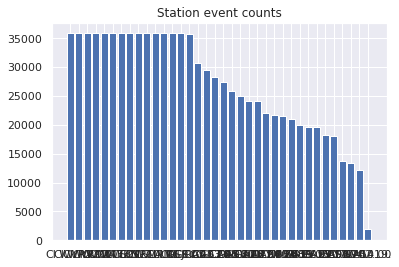

('CI.WVP2.', 'CI.WRV2.', 'CI.WRC2.', 'CI.WNM.', 'CI.WMF.', 'CI.WCS2.', 'CI.WBM.', 'CI.TOW2.', 'CI.SRT.', 'CI.SLA.', 'CI.MPM.', 'CI.LRL.', 'CI.DTP.', 'CI.CCC.', 'CI.JRC2.')
(35858, 35858, 35858, 35858, 35858, 35858, 35858, 35858, 35858, 35858, 35858, 35858, 35858, 35858, 35679)


In [5]:
sorted_dict = sorted(zip(list(stat_counts.values()), list(stat_counts.keys())))
sorted_counts, sorted_stats = zip(*sorted_dict)
sorted_counts, sorted_stats = sorted_counts[::-1], sorted_stats[::-1]
plt.bar(sorted_stats, sorted_counts)
plt.title("Station event counts")
plt.show()

master_stations = sorted_stats[:num_stations]
print(master_stations)
print(sorted_counts[:num_stations])

In [10]:
## Create array of dates
dates = sorted([entry.name.split(".")[0] for entry in list(os.scandir(data_path)) if "npy" in entry.name])
print(sorted(dates))
print(len(dates))

['2019-06-01', '2019-06-02', '2019-06-03', '2019-06-04', '2019-06-05', '2019-06-06', '2019-06-07', '2019-06-08', '2019-06-09', '2019-06-10', '2019-06-11', '2019-06-12', '2019-06-13', '2019-06-14', '2019-06-15', '2019-06-16', '2019-06-17', '2019-06-18', '2019-06-19', '2019-06-20', '2019-06-21', '2019-06-22', '2019-06-23', '2019-06-24', '2019-06-25', '2019-06-26', '2019-06-27', '2019-06-28', '2019-06-29', '2019-06-30', '2019-07-01', '2019-07-02', '2019-07-03', '2019-07-04', '2019-07-05', '2019-07-06', '2019-07-07', '2019-07-08', '2019-07-09', '2019-07-10', '2019-07-11', '2019-07-12', '2019-07-13', '2019-07-14', '2019-07-15', '2019-07-16', '2019-07-17', '2019-07-18', '2019-07-19', '2019-07-20', '2019-07-21', '2019-07-22', '2019-07-23', '2019-07-24', '2019-07-25', '2019-07-26', '2019-07-27', '2019-07-28', '2019-07-29', '2019-07-30', '2019-07-31', '2019-08-01', '2019-08-02', '2019-08-03', '2019-08-04', '2019-08-05', '2019-08-06', '2019-08-07', '2019-08-08', '2019-08-09', '2019-08-10', '2019

In [14]:
## For each date:
from tqdm import tqdm
if not os.path.exists(save_path):
    os.mkdir(save_path)

print("Extracting data for stations: {}".format(master_stations))
np.save(os.path.join(save_path, "stations.npy"), master_stations)


for date in tqdm(dates):
    date_data = os.path.join(data_path, date+".npy")
#     print("Loading data from date {}".format(date))
    date_arr = np.load(date_data)
    
    ## look for stations for that day (metadata)
    station_meta = os.path.join(meta_path, date+"_stations.npy")
#     print("\tLoading metadata from {}".format(station_meta))
    date_stations = np.load(station_meta)
    delete_date = False
    stats_for_date = []
#     print("\tStations for date {}: {}".format(date, date_stations))

    for master in master_stations: 
        if master not in date_stations: 
            delete_date = True
            break            
        idx_date = date_arr[date_stations == master]
#         print(idx)
#         stats_for_date.append(date_arr[idx, :, :,])
        stats_for_date.append(idx_date)

    if delete_date is True: 
        print("\tDeleting date {}".format(date))
        continue
    stats_for_date = np.concatenate(stats_for_date, 0)
    assert stats_for_date.shape[0] == len(master_stations)
    date_save = os.path.join(save_path, "{}.npy".format(date))
    stats_for_date = np.transpose(stats_for_date, [1, 0, 2, 3]) #(num_evs, stats, dim, time)
    stats_for_date = np.linalg.norm(stats_for_date, ord=2, axis=2)
#     print(stats_for_date.shape)
    np.save(date_save, stats_for_date)


  0%|          | 0/122 [00:00<?, ?it/s]

Extracting data for stations: ('CI.WVP2.', 'CI.WRV2.', 'CI.WRC2.', 'CI.WNM.', 'CI.WMF.', 'CI.WCS2.', 'CI.WBM.', 'CI.TOW2.', 'CI.SRT.', 'CI.SLA.', 'CI.MPM.', 'CI.LRL.', 'CI.DTP.', 'CI.CCC.', 'CI.JRC2.')
Loading data from date 2019-06-01


  1%|          | 1/122 [00:00<00:37,  3.21it/s]

	Loading metadata from ../metadata_2/2019-06-01_stations.npy
	Stations for date 2019-06-01: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.']
(5, 15, 6000)
Loading data from date 2019-06-02


  2%|▏         | 2/122 [00:00<00:34,  3.51it/s]

	Loading metadata from ../metadata_2/2019-06-02_stations.npy
	Stations for date 2019-06-02: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.']
(7, 15, 6000)
Loading data from date 2019-06-03
	Loading metadata from ../metadata_2/2019-06-03_stations.npy
	Stations for date 2019-06-03: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.']
(2, 15, 6000)
Loading data from date 2019-06-04
	Loading metadata from ../metadata_2/2019-06-04_stations.npy
	Stations for date 2019-06-04: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.']


  3%|▎         | 4/122 [00:00<00:26,  4.42it/s]

(4, 15, 6000)
Loading data from date 2019-06-05


  4%|▍         | 5/122 [00:00<00:27,  4.20it/s]

	Loading metadata from ../metadata_2/2019-06-05_stations.npy
	Stations for date 2019-06-05: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.']
(10, 15, 6000)
Loading data from date 2019-06-06


  5%|▍         | 6/122 [00:01<00:28,  4.08it/s]

	Loading metadata from ../metadata_2/2019-06-06_stations.npy
	Stations for date 2019-06-06: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.']
(15, 15, 6000)
Loading data from date 2019-06-07
	Loading metadata from ../metadata_2/2019-06-07_stations.npy
	Stations for date 2019-06-07: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.']
(4, 15, 6000)
Loading data from date 2019-06-08


  7%|▋         | 8/122 [00:01<00:24,  4.62it/s]

	Loading metadata from ../metadata_2/2019-06-08_stations.npy
	Stations for date 2019-06-08: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.']
(11, 15, 6000)
Loading data from date 2019-06-09
	Loading metadata from ../metadata_2/2019-06-09_stations.npy
	Stations for date 2019-06-09: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.']
(5, 15, 6000)


  7%|▋         | 9/122 [00:01<00:21,  5.14it/s]

Loading data from date 2019-06-10
	Loading metadata from ../metadata_2/2019-06-10_stations.npy
	Stations for date 2019-06-10: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.']
(10, 15, 6000)


  8%|▊         | 10/122 [00:01<00:22,  4.95it/s]

Loading data from date 2019-06-11
	Loading metadata from ../metadata_2/2019-06-11_stations.npy
	Stations for date 2019-06-11: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.']
(2, 15, 6000)
Loading data from date 2019-06-12
	Loading metadata from ../metadata_2/2019-06-12_stations.npy
	Stations for date 2019-06-12: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.']
(3, 15, 6000)
Loading data from date 2019-06-13


 11%|█         | 13/122 [00:02<00:18,  5.74it/s]

	Loading metadata from ../metadata_2/2019-06-13_stations.npy
	Stations for date 2019-06-13: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.']
(9, 15, 6000)
Loading data from date 2019-06-14
	Loading metadata from ../metadata_2/2019-06-14_stations.npy
	Stations for date 2019-06-14: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.']
(5, 15, 6000)
Loading data from date 2019-06-15


 12%|█▏        | 15/122 [00:02<00:18,  5.84it/s]

	Loading metadata from ../metadata_2/2019-06-15_stations.npy
	Stations for date 2019-06-15: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.']
(12, 15, 6000)
Loading data from date 2019-06-16


 13%|█▎        | 16/122 [00:02<00:22,  4.80it/s]

	Loading metadata from ../metadata_2/2019-06-16_stations.npy
	Stations for date 2019-06-16: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.']
(20, 15, 6000)
Loading data from date 2019-06-17
	Loading metadata from ../metadata_2/2019-06-17_stations.npy
	Stations for date 2019-06-17: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.']
(5, 15, 6000)
Loading data from date 2019-06-18


 16%|█▌        | 19/122 [00:03<00:16,  6.35it/s]

	Loading metadata from ../metadata_2/2019-06-18_stations.npy
	Stations for date 2019-06-18: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.']
(7, 15, 6000)
Loading data from date 2019-06-19
	Loading metadata from ../metadata_2/2019-06-19_stations.npy
	Stations for date 2019-06-19: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.']
(6, 15, 6000)
Loading data from date 2019-06-20
	Loading metadata from ../metadata_2/2019-06-20_stations.npy
	Stations for date 2019-06-20: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.']
(4, 15, 6000)


 17%|█▋        | 21/122 [00:03<00:12,  7.78it/s]

Loading data from date 2019-06-21
	Loading metadata from ../metadata_2/2019-06-21_stations.npy
	Stations for date 2019-06-21: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.']
(10, 15, 6000)
Loading data from date 2019-06-22


 19%|█▉        | 23/122 [00:03<00:12,  7.64it/s]

	Loading metadata from ../metadata_2/2019-06-22_stations.npy
	Stations for date 2019-06-22: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.']
(2, 15, 6000)
Loading data from date 2019-06-23
	Loading metadata from ../metadata_2/2019-06-23_stations.npy
	Stations for date 2019-06-23: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.']
(3, 15, 6000)
Loading data from date 2019-06-24


 20%|█▉        | 24/122 [00:03<00:13,  7.25it/s]

	Loading metadata from ../metadata_2/2019-06-24_stations.npy
	Stations for date 2019-06-24: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.']
(6, 15, 6000)
Loading data from date 2019-06-25
	Loading metadata from ../metadata_2/2019-06-25_stations.npy
	Stations for date 2019-06-25: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.']
(7, 15, 6000)
Loading data from date 2019-06-26


 21%|██▏       | 26/122 [00:04<00:13,  6.91it/s]

	Loading metadata from ../metadata_2/2019-06-26_stations.npy
	Stations for date 2019-06-26: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.']
(11, 15, 6000)
Loading data from date 2019-06-27


 23%|██▎       | 28/122 [00:04<00:13,  6.78it/s]

	Loading metadata from ../metadata_2/2019-06-27_stations.npy
	Stations for date 2019-06-27: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.']
(6, 15, 6000)
Loading data from date 2019-06-28
	Loading metadata from ../metadata_2/2019-06-28_stations.npy
	Stations for date 2019-06-28: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.']
(7, 15, 6000)
Loading data from date 2019-06-29


 25%|██▍       | 30/122 [00:04<00:11,  7.77it/s]

	Loading metadata from ../metadata_2/2019-06-29_stations.npy
	Stations for date 2019-06-29: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.']
(7, 15, 6000)
Loading data from date 2019-06-30
	Loading metadata from ../metadata_2/2019-06-30_stations.npy
	Stations for date 2019-06-30: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.']
(5, 15, 6000)
Loading data from date 2019-07-01
	Loading metadata from ../metadata_2/2019-07-01_stations.npy
	Stations for date 2019-07-01: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.']
(8, 15, 6000)
Loading data from date 2019-07-02


 27%|██▋       | 33/122 [00:05<00:11,  7.55it/s]

	Loading metadata from ../metadata_2/2019-07-02_stations.npy
	Stations for date 2019-07-02: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.']
(12, 15, 6000)
Loading data from date 2019-07-03
	Loading metadata from ../metadata_2/2019-07-03_stations.npy
	Stations for date 2019-07-03: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.']
(1, 15, 6000)
Loading data from date 2019-07-04
	Loading metadata from ../metadata_2/2019-07-04_stations.npy
	Stations for date 2019-07-04: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.']
(516, 15, 6000)


 28%|██▊       | 34/122 [00:14<04:15,  2.91s/it]

Loading data from date 2019-07-05
	Loading metadata from ../metadata_2/2019-07-05_stations.npy
	Stations for date 2019-07-05: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.']
(1224, 15, 6000)


 29%|██▊       | 35/122 [00:36<12:32,  8.65s/it]

Loading data from date 2019-07-06
	Loading metadata from ../metadata_2/2019-07-06_stations.npy
	Stations for date 2019-07-06: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'NP.5419.']
(1895, 15, 6000)


 30%|██▉       | 36/122 [01:16<26:01, 18.16s/it]

Loading data from date 2019-07-07
	Loading metadata from ../metadata_2/2019-07-07_stations.npy
	Stations for date 2019-07-07: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA02.20' 'ZY.SV03.' 'ZY.SV05.']
(1235, 15, 6000)


 30%|███       | 37/122 [01:40<28:16, 19.96s/it]

Loading data from date 2019-07-08
	Loading metadata from ../metadata_2/2019-07-08_stations.npy
	Stations for date 2019-07-08: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA02.20' 'ZY.SV03.' 'ZY.SV05.'
 'ZY.SV07.']
(1335, 15, 6000)


 31%|███       | 38/122 [02:14<33:37, 24.02s/it]

Loading data from date 2019-07-09
	Loading metadata from ../metadata_2/2019-07-09_stations.npy
	Stations for date 2019-07-09: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA02.20' 'GS.CA03.20' 'NP.5419.10'
 'ZY.SV03.' 'ZY.SV05.' 'ZY.SV07.']
(1822, 15, 6000)


 32%|███▏      | 39/122 [02:59<41:49, 30.23s/it]

Loading data from date 2019-07-10
	Loading metadata from ../metadata_2/2019-07-10_stations.npy
	Stations for date 2019-07-10: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA02.20' 'GS.CA03.20' 'GS.CA04.20'
 'GS.CA05.20' 'NP.5419.10' 'ZY.SV01.' 'ZY.SV03.' 'ZY.SV05.' 'ZY.SV07.']
(1830, 15, 6000)


 33%|███▎      | 40/122 [03:52<50:46, 37.15s/it]

Loading data from date 2019-07-11
	Loading metadata from ../metadata_2/2019-07-11_stations.npy
	Stations for date 2019-07-11: ['CI.CCC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.' 'CI.SRT.'
 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.' 'CI.WRV2.'
 'CI.WVP2.' 'GS.CA01.20' 'GS.CA02.20' 'GS.CA03.20' 'GS.CA04.20'
 'GS.CA05.20' 'GS.CA06.20' 'NP.5419.10' 'ZY.SV01.' 'ZY.SV03.' 'ZY.SV05.'
 'ZY.SV06.' 'ZY.SV07.' 'ZY.SV08.']
(1567, 15, 6000)


 34%|███▎      | 41/122 [04:39<54:10, 40.13s/it]

Loading data from date 2019-07-12
	Loading metadata from ../metadata_2/2019-07-12_stations.npy
	Stations for date 2019-07-12: ['CI.CCC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.' 'CI.SRT.'
 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.' 'CI.WRV2.'
 'CI.WVP2.' 'GS.CA01.20' 'GS.CA02.20' 'GS.CA03.20' 'GS.CA04.20'
 'GS.CA05.20' 'GS.CA06.20' 'GS.CA07.00' 'GS.CA08.00' 'NP.5419.10'
 'ZY.SV01.' 'ZY.SV02.' 'ZY.SV03.' 'ZY.SV04.' 'ZY.SV05.' 'ZY.SV06.'
 'ZY.SV07.' 'ZY.SV08.']
(1615, 15, 6000)


 34%|███▍      | 42/122 [05:32<58:46, 44.08s/it]

Loading data from date 2019-07-13
	Loading metadata from ../metadata_2/2019-07-13_stations.npy
	Stations for date 2019-07-13: ['CI.CCC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.' 'CI.SRT.'
 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.' 'CI.WRV2.'
 'CI.WVP2.' 'GS.CA01.20' 'GS.CA02.20' 'GS.CA03.20' 'GS.CA04.20'
 'GS.CA05.20' 'GS.CA06.20' 'GS.CA07.00' 'GS.CA08.00' 'NP.5419.10'
 'ZY.SV01.' 'ZY.SV02.' 'ZY.SV03.' 'ZY.SV04.' 'ZY.SV05.' 'ZY.SV06.'
 'ZY.SV07.' 'ZY.SV08.']
(836, 15, 6000)


 35%|███▌      | 43/122 [05:58<50:51, 38.63s/it]

Loading data from date 2019-07-14
	Loading metadata from ../metadata_2/2019-07-14_stations.npy
	Stations for date 2019-07-14: ['CI.CCC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.' 'CI.SRT.'
 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.' 'CI.WRV2.'
 'CI.WVP2.' 'GS.CA01.20' 'GS.CA02.20' 'GS.CA03.20' 'GS.CA04.20'
 'GS.CA05.20' 'GS.CA06.20' 'GS.CA07.00' 'GS.CA08.00' 'NP.5419.10'
 'ZY.SV01.' 'ZY.SV02.' 'ZY.SV03.' 'ZY.SV04.' 'ZY.SV05.' 'ZY.SV06.'
 'ZY.SV07.' 'ZY.SV08.']
(731, 15, 6000)


 36%|███▌      | 44/122 [06:25<45:23, 34.92s/it]

Loading data from date 2019-07-15
	Loading metadata from ../metadata_2/2019-07-15_stations.npy
	Stations for date 2019-07-15: ['CI.CCC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.' 'CI.SRT.'
 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.' 'CI.WRV2.'
 'CI.WVP2.' 'GS.CA01.20' 'GS.CA02.20' 'GS.CA03.20' 'GS.CA04.20'
 'GS.CA05.20' 'GS.CA06.20' 'GS.CA07.00' 'GS.CA08.00' 'NP.5419.10'
 'ZY.SV01.' 'ZY.SV05.' 'ZY.SV06.' 'ZY.SV07.' 'ZY.SV08.']
(744, 15, 6000)


 37%|███▋      | 45/122 [06:47<40:00, 31.18s/it]

Loading data from date 2019-07-16
	Loading metadata from ../metadata_2/2019-07-16_stations.npy
	Stations for date 2019-07-16: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA02.20' 'GS.CA03.20' 'GS.CA04.20'
 'GS.CA05.20' 'GS.CA06.20' 'GS.CA07.00' 'GS.CA08.00' 'NP.5419.10'
 'ZY.SV01.' 'ZY.SV05.' 'ZY.SV07.' 'ZY.SV08.']
(694, 15, 6000)


 38%|███▊      | 46/122 [07:08<35:31, 28.04s/it]

Loading data from date 2019-07-17
	Loading metadata from ../metadata_2/2019-07-17_stations.npy
	Stations for date 2019-07-17: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA02.20' 'GS.CA03.20' 'GS.CA04.20'
 'GS.CA05.20' 'GS.CA06.20' 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00'
 'NP.5419.10' 'ZY.SV01.' 'ZY.SV05.' 'ZY.SV07.' 'ZY.SV08.']
(739, 15, 6000)


 39%|███▊      | 47/122 [07:30<33:02, 26.43s/it]

Loading data from date 2019-07-18
	Loading metadata from ../metadata_2/2019-07-18_stations.npy
	Stations for date 2019-07-18: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA02.20' 'GS.CA03.20' 'GS.CA04.20'
 'GS.CA05.20' 'GS.CA06.20' 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00'
 'NP.5419.10' 'ZY.SV01.' 'ZY.SV05.' 'ZY.SV07.']
(647, 15, 6000)


 39%|███▉      | 48/122 [07:50<30:09, 24.46s/it]

Loading data from date 2019-07-19
	Loading metadata from ../metadata_2/2019-07-19_stations.npy
	Stations for date 2019-07-19: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA02.20' 'GS.CA03.20' 'GS.CA04.20'
 'GS.CA05.20' 'GS.CA06.20' 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00'
 'NP.5419.10' 'ZY.SV02.' 'ZY.SV03.' 'ZY.SV04.' 'ZY.SV05.' 'ZY.SV07.']
(559, 15, 6000)


 40%|████      | 49/122 [08:09<27:39, 22.73s/it]

Loading data from date 2019-07-20
	Loading metadata from ../metadata_2/2019-07-20_stations.npy
	Stations for date 2019-07-20: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA02.20' 'GS.CA03.20' 'GS.CA04.20'
 'GS.CA05.20' 'GS.CA06.20' 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00'
 'NP.5419.10' 'ZY.SV01.' 'ZY.SV02.' 'ZY.SV03.' 'ZY.SV04.' 'ZY.SV05.'
 'ZY.SV06.' 'ZY.SV07.' 'ZY.SV08.']
(573, 15, 6000)


 41%|████      | 50/122 [08:28<26:07, 21.77s/it]

Loading data from date 2019-07-21
	Loading metadata from ../metadata_2/2019-07-21_stations.npy
	Stations for date 2019-07-21: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA02.20' 'GS.CA03.20' 'GS.CA04.20'
 'GS.CA05.20' 'GS.CA06.20' 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00'
 'NP.5419.10' 'ZY.SV01.' 'ZY.SV02.' 'ZY.SV03.' 'ZY.SV04.' 'ZY.SV05.'
 'ZY.SV06.' 'ZY.SV07.' 'ZY.SV08.']
(551, 15, 6000)


 42%|████▏     | 51/122 [08:48<24:49, 20.98s/it]

Loading data from date 2019-07-22
	Loading metadata from ../metadata_2/2019-07-22_stations.npy
	Stations for date 2019-07-22: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA02.20' 'GS.CA03.20' 'GS.CA04.20'
 'GS.CA05.20' 'GS.CA06.20' 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00'
 'NP.5419.10' 'ZY.SV01.' 'ZY.SV02.' 'ZY.SV03.' 'ZY.SV04.' 'ZY.SV05.'
 'ZY.SV06.' 'ZY.SV07.' 'ZY.SV08.']
(545, 15, 6000)


 43%|████▎     | 52/122 [09:07<23:46, 20.38s/it]

Loading data from date 2019-07-23
	Loading metadata from ../metadata_2/2019-07-23_stations.npy
	Stations for date 2019-07-23: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA02.20' 'GS.CA03.20' 'GS.CA04.20'
 'GS.CA05.20' 'GS.CA06.20' 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00'
 'NP.5419.10' 'ZY.SV01.' 'ZY.SV02.' 'ZY.SV03.' 'ZY.SV04.' 'ZY.SV05.'
 'ZY.SV06.' 'ZY.SV07.' 'ZY.SV08.']
(495, 15, 6000)


 43%|████▎     | 53/122 [09:24<22:22, 19.45s/it]

Loading data from date 2019-07-24
	Loading metadata from ../metadata_2/2019-07-24_stations.npy
	Stations for date 2019-07-24: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA02.20' 'GS.CA03.20' 'GS.CA04.20'
 'GS.CA05.20' 'GS.CA06.20' 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00'
 'NP.5419.10' 'ZY.SV01.' 'ZY.SV02.' 'ZY.SV03.' 'ZY.SV04.' 'ZY.SV05.'
 'ZY.SV06.' 'ZY.SV07.' 'ZY.SV08.']
(472, 15, 6000)


 44%|████▍     | 54/122 [09:39<20:31, 18.10s/it]

Loading data from date 2019-07-25
	Loading metadata from ../metadata_2/2019-07-25_stations.npy
	Stations for date 2019-07-25: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA02.20' 'GS.CA03.20' 'GS.CA04.20'
 'GS.CA05.20' 'GS.CA06.20' 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00'
 'NP.5419.10' 'ZY.SV01.' 'ZY.SV06.' 'ZY.SV08.']
(462, 15, 6000)


 45%|████▌     | 55/122 [09:53<18:55, 16.95s/it]

Loading data from date 2019-07-26
	Loading metadata from ../metadata_2/2019-07-26_stations.npy
	Stations for date 2019-07-26: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA02.20' 'GS.CA03.20' 'GS.CA04.20'
 'GS.CA05.20' 'GS.CA06.20' 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00'
 'NP.5419.10' 'ZY.SV01.' 'ZY.SV06.' 'ZY.SV08.']
(644, 15, 6000)


 46%|████▌     | 56/122 [10:12<19:20, 17.58s/it]

Loading data from date 2019-07-27
	Loading metadata from ../metadata_2/2019-07-27_stations.npy
	Stations for date 2019-07-27: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA04.20' 'GS.CA05.20'
 'GS.CA06.20' 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'NP.5419.10'
 'ZY.SV01.' 'ZY.SV06.' 'ZY.SV08.']
(446, 15, 6000)


 47%|████▋     | 57/122 [10:25<17:32, 16.20s/it]

Loading data from date 2019-07-28
	Loading metadata from ../metadata_2/2019-07-28_stations.npy
	Stations for date 2019-07-28: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA04.20' 'GS.CA05.20'
 'GS.CA06.20' 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'NP.5419.10'
 'ZY.SV01.' 'ZY.SV06.' 'ZY.SV08.']
(567, 15, 6000)


 48%|████▊     | 58/122 [10:42<17:35, 16.48s/it]

Loading data from date 2019-07-29
	Loading metadata from ../metadata_2/2019-07-29_stations.npy
	Stations for date 2019-07-29: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA04.20' 'GS.CA05.20'
 'GS.CA06.20' 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'NP.5419.10'
 'ZY.SV01.' 'ZY.SV06.' 'ZY.SV08.']
(371, 15, 6000)


 48%|████▊     | 59/122 [10:54<15:46, 15.02s/it]

Loading data from date 2019-07-30
	Loading metadata from ../metadata_2/2019-07-30_stations.npy
	Stations for date 2019-07-30: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA04.20' 'GS.CA05.20'
 'GS.CA06.20' 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'NP.5419.10'
 'ZY.SV01.' 'ZY.SV06.' 'ZY.SV08.']
(398, 15, 6000)


 49%|████▉     | 60/122 [11:06<14:34, 14.10s/it]

Loading data from date 2019-07-31
	Loading metadata from ../metadata_2/2019-07-31_stations.npy
	Stations for date 2019-07-31: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA05.20' 'GS.CA06.20'
 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00' 'NP.5419.10'
 'ZY.SV01.' 'ZY.SV06.' 'ZY.SV08.']
(250, 15, 6000)


 50%|█████     | 61/122 [11:13<12:05, 11.89s/it]

Loading data from date 2019-08-01
	Loading metadata from ../metadata_2/2019-08-01_stations.npy
	Stations for date 2019-08-01: ['CI.CCC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.' 'CI.SRT.'
 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.' 'CI.WRV2.'
 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA05.20' 'GS.CA06.20'
 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00' 'NP.5419.10'
 'ZY.SV01.' 'ZY.SV06.' 'ZY.SV08.']
(196, 15, 6000)


 51%|█████     | 62/122 [11:19<10:20, 10.34s/it]

Loading data from date 2019-08-02
	Loading metadata from ../metadata_2/2019-08-02_stations.npy
	Stations for date 2019-08-02: ['CI.CCC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.' 'CI.SRT.'
 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.' 'CI.WRV2.'
 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA04.20' 'GS.CA05.20'
 'GS.CA06.20' 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00'
 'NP.5419.10' 'ZY.SV01.' 'ZY.SV06.' 'ZY.SV08.']


 52%|█████▏    | 63/122 [11:24<08:33,  8.70s/it]

(185, 15, 6000)
Loading data from date 2019-08-03
	Loading metadata from ../metadata_2/2019-08-03_stations.npy
	Stations for date 2019-08-03: ['CI.CCC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.' 'CI.SRT.'
 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.' 'CI.WRV2.'
 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA05.20' 'GS.CA06.20'
 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00' 'NP.5419.10'
 'ZY.SV01.' 'ZY.SV06.' 'ZY.SV08.']
(221, 15, 6000)


 52%|█████▏    | 64/122 [11:31<07:55,  8.20s/it]

Loading data from date 2019-08-04
	Loading metadata from ../metadata_2/2019-08-04_stations.npy
	Stations for date 2019-08-04: ['CI.CCC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.' 'CI.SRT.'
 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.' 'CI.WRV2.'
 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA05.20' 'GS.CA06.20'
 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00' 'NP.5419.10'
 'ZY.SV01.' 'ZY.SV06.' 'ZY.SV08.']
(244, 15, 6000)


 53%|█████▎    | 65/122 [11:39<07:36,  8.00s/it]

Loading data from date 2019-08-05
	Loading metadata from ../metadata_2/2019-08-05_stations.npy
	Stations for date 2019-08-05: ['CI.CCC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.' 'CI.SRT.'
 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.' 'CI.WRV2.'
 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA05.20' 'GS.CA06.20'
 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00' 'NP.5419.10'
 'ZY.SV01.' 'ZY.SV06.' 'ZY.SV08.']
(271, 15, 6000)


 54%|█████▍    | 66/122 [11:46<07:21,  7.89s/it]

Loading data from date 2019-08-06
	Loading metadata from ../metadata_2/2019-08-06_stations.npy
	Stations for date 2019-08-06: ['CI.CCC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.' 'CI.SRT.'
 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.' 'CI.WRV2.'
 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA04.20' 'GS.CA05.20'
 'GS.CA06.20' 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00'
 'ZY.SV01.' 'ZY.SV06.' 'ZY.SV08.']
(226, 15, 6000)


 55%|█████▍    | 67/122 [11:53<06:49,  7.45s/it]

Loading data from date 2019-08-07
	Loading metadata from ../metadata_2/2019-08-07_stations.npy
	Stations for date 2019-08-07: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA05.20' 'GS.CA06.20'
 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00' 'ZY.SV01.' 'ZY.SV06.'
 'ZY.SV08.']
(221, 15, 6000)


 56%|█████▌    | 68/122 [11:59<06:23,  7.11s/it]

Loading data from date 2019-08-08
	Loading metadata from ../metadata_2/2019-08-08_stations.npy
	Stations for date 2019-08-08: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA05.20' 'GS.CA06.20'
 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00' 'ZY.SV01.' 'ZY.SV06.'
 'ZY.SV08.']
(261, 15, 6000)


 57%|█████▋    | 69/122 [12:07<06:22,  7.22s/it]

Loading data from date 2019-08-09
	Loading metadata from ../metadata_2/2019-08-09_stations.npy
	Stations for date 2019-08-09: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA04.20' 'GS.CA05.20'
 'GS.CA06.20' 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00'
 'ZY.SV01.' 'ZY.SV06.' 'ZY.SV08.']
(240, 15, 6000)


 57%|█████▋    | 70/122 [12:14<06:19,  7.29s/it]

Loading data from date 2019-08-10
	Loading metadata from ../metadata_2/2019-08-10_stations.npy
	Stations for date 2019-08-10: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA04.20' 'GS.CA05.20'
 'GS.CA06.20' 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00'
 'ZY.SV01.' 'ZY.SV03.' 'ZY.SV06.' 'ZY.SV08.']
(245, 15, 6000)


 58%|█████▊    | 71/122 [12:22<06:25,  7.56s/it]

Loading data from date 2019-08-11
	Loading metadata from ../metadata_2/2019-08-11_stations.npy
	Stations for date 2019-08-11: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA04.20' 'GS.CA05.20'
 'GS.CA06.20' 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00'
 'ZY.SV01.' 'ZY.SV03.' 'ZY.SV04.' 'ZY.SV05.' 'ZY.SV06.' 'ZY.SV08.']
(290, 15, 6000)


 59%|█████▉    | 72/122 [12:32<06:44,  8.09s/it]

Loading data from date 2019-08-12
	Loading metadata from ../metadata_2/2019-08-12_stations.npy
	Stations for date 2019-08-12: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA05.20' 'GS.CA06.20'
 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00' 'ZY.SV01.' 'ZY.SV02.'
 'ZY.SV03.' 'ZY.SV04.' 'ZY.SV05.' 'ZY.SV06.' 'ZY.SV07.' 'ZY.SV08.']
(315, 15, 6000)


 60%|█████▉    | 73/122 [12:42<07:16,  8.91s/it]

Loading data from date 2019-08-13
	Loading metadata from ../metadata_2/2019-08-13_stations.npy
	Stations for date 2019-08-13: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA05.20' 'GS.CA06.20'
 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00' 'ZY.SV01.' 'ZY.SV02.'
 'ZY.SV03.' 'ZY.SV04.' 'ZY.SV05.' 'ZY.SV06.' 'ZY.SV07.' 'ZY.SV08.']
(257, 15, 6000)


 61%|██████    | 74/122 [12:51<07:07,  8.90s/it]

Loading data from date 2019-08-14
	Loading metadata from ../metadata_2/2019-08-14_stations.npy
	Stations for date 2019-08-14: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA05.20' 'GS.CA06.20'
 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00' 'ZY.SV01.' 'ZY.SV02.'
 'ZY.SV03.' 'ZY.SV04.' 'ZY.SV05.' 'ZY.SV06.' 'ZY.SV07.' 'ZY.SV08.']
(294, 15, 6000)


 61%|██████▏   | 75/122 [13:01<07:08,  9.12s/it]

Loading data from date 2019-08-15
	Loading metadata from ../metadata_2/2019-08-15_stations.npy
	Stations for date 2019-08-15: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA04.20' 'GS.CA05.20'
 'GS.CA06.20' 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00'
 'ZY.SV01.' 'ZY.SV02.' 'ZY.SV03.' 'ZY.SV04.' 'ZY.SV05.' 'ZY.SV06.'
 'ZY.SV07.' 'ZY.SV08.']
(243, 15, 6000)


 62%|██████▏   | 76/122 [13:09<06:49,  8.90s/it]

Loading data from date 2019-08-16
	Loading metadata from ../metadata_2/2019-08-16_stations.npy
	Stations for date 2019-08-16: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA04.20' 'GS.CA05.20'
 'GS.CA06.20' 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00'
 'ZY.SV01.' 'ZY.SV02.' 'ZY.SV03.' 'ZY.SV04.' 'ZY.SV06.' 'ZY.SV07.'
 'ZY.SV08.']
(229, 15, 6000)


 63%|██████▎   | 77/122 [13:17<06:22,  8.50s/it]

Loading data from date 2019-08-17
	Loading metadata from ../metadata_2/2019-08-17_stations.npy
	Stations for date 2019-08-17: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA04.20' 'GS.CA05.20'
 'GS.CA06.20' 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00'
 'ZY.SV01.' 'ZY.SV02.' 'ZY.SV03.' 'ZY.SV04.' 'ZY.SV06.' 'ZY.SV07.'
 'ZY.SV08.']
(263, 15, 6000)


 64%|██████▍   | 78/122 [13:26<06:18,  8.60s/it]

Loading data from date 2019-08-18
	Loading metadata from ../metadata_2/2019-08-18_stations.npy
	Stations for date 2019-08-18: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA04.20' 'GS.CA05.20'
 'GS.CA06.20' 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00'
 'ZY.SV01.' 'ZY.SV02.' 'ZY.SV03.' 'ZY.SV04.' 'ZY.SV06.' 'ZY.SV08.']
(222, 15, 6000)


 65%|██████▍   | 79/122 [13:32<05:42,  7.95s/it]

Loading data from date 2019-08-19
	Loading metadata from ../metadata_2/2019-08-19_stations.npy
	Stations for date 2019-08-19: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA04.20' 'GS.CA05.20'
 'GS.CA06.20' 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00'
 'ZY.SV01.' 'ZY.SV02.' 'ZY.SV03.' 'ZY.SV04.' 'ZY.SV06.' 'ZY.SV08.']
(258, 15, 6000)


 66%|██████▌   | 80/122 [13:41<05:45,  8.24s/it]

Loading data from date 2019-08-20
	Loading metadata from ../metadata_2/2019-08-20_stations.npy
	Stations for date 2019-08-20: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA04.20' 'GS.CA05.20'
 'GS.CA06.20' 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00'
 'ZY.SV01.' 'ZY.SV02.' 'ZY.SV03.' 'ZY.SV04.' 'ZY.SV06.' 'ZY.SV08.']
(228, 15, 6000)


 66%|██████▋   | 81/122 [13:49<05:31,  8.09s/it]

Loading data from date 2019-08-21
	Loading metadata from ../metadata_2/2019-08-21_stations.npy
	Stations for date 2019-08-21: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA04.20' 'GS.CA05.20'
 'GS.CA06.20' 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00'
 'ZY.SV01.' 'ZY.SV02.' 'ZY.SV03.' 'ZY.SV04.' 'ZY.SV06.' 'ZY.SV08.']
(256, 15, 6000)


 67%|██████▋   | 82/122 [13:56<05:18,  7.95s/it]

Loading data from date 2019-08-22
	Loading metadata from ../metadata_2/2019-08-22_stations.npy
	Stations for date 2019-08-22: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA04.20' 'GS.CA05.20'
 'GS.CA06.20' 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00'
 'ZY.SV01.' 'ZY.SV02.' 'ZY.SV03.' 'ZY.SV04.' 'ZY.SV06.' 'ZY.SV08.']
(357, 15, 6000)


 68%|██████▊   | 83/122 [14:09<06:02,  9.30s/it]

Loading data from date 2019-08-23
	Loading metadata from ../metadata_2/2019-08-23_stations.npy
	Stations for date 2019-08-23: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA04.20' 'GS.CA05.20'
 'GS.CA06.20' 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00'
 'ZY.SV01.' 'ZY.SV02.' 'ZY.SV03.' 'ZY.SV04.' 'ZY.SV06.' 'ZY.SV08.']
(424, 15, 6000)


 69%|██████▉   | 84/122 [14:23<06:48, 10.74s/it]

Loading data from date 2019-08-24
	Loading metadata from ../metadata_2/2019-08-24_stations.npy
	Stations for date 2019-08-24: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA04.20' 'GS.CA05.20'
 'GS.CA06.20' 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00'
 'ZY.SV01.' 'ZY.SV02.' 'ZY.SV03.' 'ZY.SV04.' 'ZY.SV06.' 'ZY.SV08.']
(285, 15, 6000)


 70%|██████▉   | 85/122 [14:32<06:20, 10.29s/it]

Loading data from date 2019-08-25
	Loading metadata from ../metadata_2/2019-08-25_stations.npy
	Stations for date 2019-08-25: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA04.20' 'GS.CA05.20'
 'GS.CA06.20' 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00'
 'ZY.SV01.' 'ZY.SV02.' 'ZY.SV03.' 'ZY.SV04.' 'ZY.SV06.' 'ZY.SV08.']
(267, 15, 6000)


 70%|███████   | 86/122 [14:40<05:46,  9.63s/it]

Loading data from date 2019-08-26
	Loading metadata from ../metadata_2/2019-08-26_stations.npy
	Stations for date 2019-08-26: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA04.20' 'GS.CA05.20'
 'GS.CA06.20' 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00'
 'ZY.SV01.' 'ZY.SV02.' 'ZY.SV03.' 'ZY.SV04.' 'ZY.SV06.' 'ZY.SV08.']
(275, 15, 6000)


 71%|███████▏  | 87/122 [14:49<05:29,  9.41s/it]

Loading data from date 2019-08-27
	Loading metadata from ../metadata_2/2019-08-27_stations.npy
	Stations for date 2019-08-27: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA05.20' 'GS.CA06.20'
 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00' 'ZY.SV01.' 'ZY.SV02.'
 'ZY.SV03.' 'ZY.SV04.' 'ZY.SV06.' 'ZY.SV08.']
(251, 15, 6000)


 72%|███████▏  | 88/122 [14:57<05:08,  9.07s/it]

Loading data from date 2019-08-28
	Loading metadata from ../metadata_2/2019-08-28_stations.npy
	Stations for date 2019-08-28: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA05.20' 'GS.CA06.20'
 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00' 'ZY.SV01.' 'ZY.SV02.'
 'ZY.SV03.' 'ZY.SV04.' 'ZY.SV06.' 'ZY.SV08.']
(233, 15, 6000)


 73%|███████▎  | 89/122 [15:04<04:34,  8.33s/it]

Loading data from date 2019-08-29
	Loading metadata from ../metadata_2/2019-08-29_stations.npy
	Stations for date 2019-08-29: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA05.20' 'GS.CA06.20'
 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00' 'ZY.SV01.' 'ZY.SV02.'
 'ZY.SV03.' 'ZY.SV04.' 'ZY.SV06.' 'ZY.SV08.']
(213, 15, 6000)


 74%|███████▍  | 90/122 [15:11<04:15,  7.98s/it]

Loading data from date 2019-08-30
	Loading metadata from ../metadata_2/2019-08-30_stations.npy
	Stations for date 2019-08-30: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA04.20' 'GS.CA05.20'
 'GS.CA06.20' 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00'
 'ZY.SV01.' 'ZY.SV02.' 'ZY.SV03.' 'ZY.SV04.' 'ZY.SV06.' 'ZY.SV08.']
(201, 15, 6000)


 75%|███████▍  | 91/122 [15:17<03:46,  7.32s/it]

Loading data from date 2019-08-31
	Loading metadata from ../metadata_2/2019-08-31_stations.npy
	Stations for date 2019-08-31: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA04.20' 'GS.CA05.20'
 'GS.CA06.20' 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00'
 'ZY.SV01.' 'ZY.SV02.' 'ZY.SV03.' 'ZY.SV04.' 'ZY.SV06.' 'ZY.SV08.']
(233, 15, 6000)


 75%|███████▌  | 92/122 [15:26<03:54,  7.81s/it]

Loading data from date 2019-09-01
	Loading metadata from ../metadata_2/2019-09-01_stations.npy
	Stations for date 2019-09-01: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA05.20' 'GS.CA06.20'
 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00' 'ZY.SV01.' 'ZY.SV02.'
 'ZY.SV03.' 'ZY.SV04.' 'ZY.SV06.' 'ZY.SV08.']
(239, 15, 6000)


 76%|███████▌  | 93/122 [15:33<03:42,  7.66s/it]

Loading data from date 2019-09-02
	Loading metadata from ../metadata_2/2019-09-02_stations.npy
	Stations for date 2019-09-02: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA04.20' 'GS.CA05.20'
 'GS.CA06.20' 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00'
 'ZY.SV01.' 'ZY.SV02.' 'ZY.SV03.' 'ZY.SV04.' 'ZY.SV06.' 'ZY.SV08.']
(238, 15, 6000)


 77%|███████▋  | 94/122 [15:41<03:36,  7.73s/it]

Loading data from date 2019-09-03
	Loading metadata from ../metadata_2/2019-09-03_stations.npy
	Stations for date 2019-09-03: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA04.20' 'GS.CA05.20'
 'GS.CA06.20' 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00'
 'ZY.SV01.' 'ZY.SV02.' 'ZY.SV03.' 'ZY.SV04.' 'ZY.SV05.' 'ZY.SV06.'
 'ZY.SV08.']
(207, 15, 6000)


 78%|███████▊  | 95/122 [15:47<03:17,  7.32s/it]

Loading data from date 2019-09-04
	Loading metadata from ../metadata_2/2019-09-04_stations.npy
	Stations for date 2019-09-04: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA05.20' 'GS.CA06.20'
 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00' 'ZY.SV01.' 'ZY.SV02.'
 'ZY.SV03.' 'ZY.SV04.' 'ZY.SV05.' 'ZY.SV06.' 'ZY.SV08.']
(165, 15, 6000)


 79%|███████▊  | 96/122 [15:53<02:55,  6.77s/it]

Loading data from date 2019-09-05
	Loading metadata from ../metadata_2/2019-09-05_stations.npy
	Stations for date 2019-09-05: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA05.20' 'GS.CA06.20'
 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00' 'ZY.SV01.' 'ZY.SV02.'
 'ZY.SV03.' 'ZY.SV04.' 'ZY.SV05.' 'ZY.SV06.' 'ZY.SV07.']
(145, 15, 6000)


 80%|███████▉  | 97/122 [15:58<02:36,  6.25s/it]

Loading data from date 2019-09-06
	Loading metadata from ../metadata_2/2019-09-06_stations.npy
	Stations for date 2019-09-06: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA05.20' 'GS.CA06.20'
 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00' 'ZY.SV01.' 'ZY.SV02.'
 'ZY.SV03.' 'ZY.SV04.' 'ZY.SV05.' 'ZY.SV06.' 'ZY.SV07.']
(134, 15, 6000)


 80%|████████  | 98/122 [16:02<02:15,  5.65s/it]

Loading data from date 2019-09-07
	Loading metadata from ../metadata_2/2019-09-07_stations.npy
	Stations for date 2019-09-07: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA05.20' 'GS.CA06.20'
 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00' 'ZY.SV01.' 'ZY.SV02.'
 'ZY.SV03.' 'ZY.SV04.' 'ZY.SV05.' 'ZY.SV06.' 'ZY.SV07.']
(165, 15, 6000)


 81%|████████  | 99/122 [16:08<02:12,  5.75s/it]

Loading data from date 2019-09-08
	Loading metadata from ../metadata_2/2019-09-08_stations.npy
	Stations for date 2019-09-08: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA04.20' 'GS.CA05.20'
 'GS.CA06.20' 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00'
 'ZY.SV01.' 'ZY.SV02.' 'ZY.SV03.' 'ZY.SV04.' 'ZY.SV05.' 'ZY.SV06.'
 'ZY.SV07.']
(191, 15, 6000)


 82%|████████▏ | 100/122 [16:15<02:12,  6.02s/it]

Loading data from date 2019-09-09
	Loading metadata from ../metadata_2/2019-09-09_stations.npy
	Stations for date 2019-09-09: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA05.20' 'GS.CA06.20'
 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00' 'ZY.SV01.' 'ZY.SV02.'
 'ZY.SV03.' 'ZY.SV04.' 'ZY.SV05.' 'ZY.SV06.' 'ZY.SV07.']
(144, 15, 6000)


 83%|████████▎ | 101/122 [16:19<01:55,  5.51s/it]

Loading data from date 2019-09-10
	Loading metadata from ../metadata_2/2019-09-10_stations.npy
	Stations for date 2019-09-10: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA05.20' 'GS.CA06.20'
 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00' 'ZY.SV01.' 'ZY.SV02.'
 'ZY.SV03.' 'ZY.SV04.' 'ZY.SV05.' 'ZY.SV06.' 'ZY.SV07.']
(136, 15, 6000)


 84%|████████▎ | 102/122 [16:24<01:43,  5.18s/it]

Loading data from date 2019-09-11
	Loading metadata from ../metadata_2/2019-09-11_stations.npy
	Stations for date 2019-09-11: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA06.20' 'GS.CA07.00'
 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00' 'ZY.SV01.']
(144, 15, 6000)


 84%|████████▍ | 103/122 [16:27<01:28,  4.63s/it]

Loading data from date 2019-09-12
	Loading metadata from ../metadata_2/2019-09-12_stations.npy
	Stations for date 2019-09-12: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA05.20' 'GS.CA06.20'
 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00']
(173, 15, 6000)


 85%|████████▌ | 104/122 [16:32<01:23,  4.66s/it]

Loading data from date 2019-09-13
	Loading metadata from ../metadata_2/2019-09-13_stations.npy
	Stations for date 2019-09-13: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA04.20' 'GS.CA05.20'
 'GS.CA06.20' 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00']
(158, 15, 6000)


 86%|████████▌ | 105/122 [16:37<01:19,  4.70s/it]

Loading data from date 2019-09-14
	Loading metadata from ../metadata_2/2019-09-14_stations.npy
	Stations for date 2019-09-14: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA04.20' 'GS.CA05.20'
 'GS.CA06.20' 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00']
(170, 15, 6000)


 87%|████████▋ | 106/122 [16:41<01:14,  4.67s/it]

Loading data from date 2019-09-15
	Loading metadata from ../metadata_2/2019-09-15_stations.npy
	Stations for date 2019-09-15: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA04.20' 'GS.CA05.20'
 'GS.CA06.20' 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00']
(114, 15, 6000)


 88%|████████▊ | 107/122 [16:44<01:03,  4.23s/it]

Loading data from date 2019-09-16
	Loading metadata from ../metadata_2/2019-09-16_stations.npy
	Stations for date 2019-09-16: ['CI.CCC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.' 'CI.SRT.'
 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.' 'CI.WRV2.'
 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA05.20' 'GS.CA06.20'
 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00']
(83, 15, 6000)


 89%|████████▊ | 108/122 [16:46<00:50,  3.58s/it]

Loading data from date 2019-09-17
	Loading metadata from ../metadata_2/2019-09-17_stations.npy
	Stations for date 2019-09-17: ['CI.CCC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.' 'CI.SRT.'
 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.' 'CI.WRV2.'
 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA05.20' 'GS.CA06.20'
 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00' 'NP.5419.10']
(101, 15, 6000)


 89%|████████▉ | 109/122 [16:49<00:43,  3.34s/it]

Loading data from date 2019-09-18
	Loading metadata from ../metadata_2/2019-09-18_stations.npy
	Stations for date 2019-09-18: ['CI.CCC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.' 'CI.SRT.'
 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.' 'CI.WRV2.'
 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA05.20' 'GS.CA06.20'
 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00' 'NP.5419.10']
(90, 15, 6000)


 90%|█████████ | 110/122 [16:52<00:36,  3.05s/it]

Loading data from date 2019-09-19
	Loading metadata from ../metadata_2/2019-09-19_stations.npy
	Stations for date 2019-09-19: ['CI.CCC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.' 'CI.SRT.'
 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.' 'CI.WRV2.'
 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA04.20' 'GS.CA05.20'
 'GS.CA06.20' 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00'
 'NP.5419.10']
(70, 15, 6000)


 91%|█████████ | 111/122 [16:54<00:30,  2.82s/it]

Loading data from date 2019-09-20
	Loading metadata from ../metadata_2/2019-09-20_stations.npy
	Stations for date 2019-09-20: ['CI.CCC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.' 'CI.SRT.'
 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.' 'CI.WRV2.'
 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA04.20' 'GS.CA05.20'
 'GS.CA06.20' 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00'
 'NP.5419.10']
(99, 15, 6000)


 92%|█████████▏| 112/122 [16:57<00:28,  2.83s/it]

Loading data from date 2019-09-21


 93%|█████████▎| 113/122 [16:59<00:24,  2.74s/it]

	Loading metadata from ../metadata_2/2019-09-21_stations.npy
	Stations for date 2019-09-21: ['CI.CCC.' 'CI.DTP.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.' 'CI.SRT.' 'CI.TOW2.'
 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.' 'CI.WRV2.' 'CI.WVP2.'
 'GS.CA01.20' 'GS.CA03.20' 'GS.CA04.20' 'GS.CA05.20' 'GS.CA06.20'
 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00' 'NP.5419.10']
	Deleting date 2019-09-21
Loading data from date 2019-09-22


 93%|█████████▎| 114/122 [17:01<00:19,  2.44s/it]

	Loading metadata from ../metadata_2/2019-09-22_stations.npy
	Stations for date 2019-09-22: ['CI.CCC.' 'CI.DTP.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.' 'CI.SRT.' 'CI.TOW2.'
 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.' 'CI.WRV2.' 'CI.WVP2.'
 'GS.CA01.20' 'GS.CA03.20' 'GS.CA05.20' 'GS.CA06.20' 'GS.CA07.00'
 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00' 'NP.5419.10']
	Deleting date 2019-09-22
Loading data from date 2019-09-23
	Loading metadata from ../metadata_2/2019-09-23_stations.npy
	Stations for date 2019-09-23: ['CI.CCC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.' 'CI.SRT.'
 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.' 'CI.WRV2.'
 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA05.20' 'GS.CA06.20'
 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00' 'NP.5419.10']
(131, 15, 6000)


 94%|█████████▍| 115/122 [17:05<00:20,  2.92s/it]

Loading data from date 2019-09-24
	Loading metadata from ../metadata_2/2019-09-24_stations.npy
	Stations for date 2019-09-24: ['CI.CCC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.' 'CI.SRT.'
 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.' 'CI.WRV2.'
 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA05.20' 'GS.CA06.20'
 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00' 'NP.5419.10']
(68, 15, 6000)


 95%|█████████▌| 116/122 [17:07<00:15,  2.56s/it]

Loading data from date 2019-09-25
	Loading metadata from ../metadata_2/2019-09-25_stations.npy
	Stations for date 2019-09-25: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA05.20' 'GS.CA06.20'
 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00' 'NP.5419.10']
(85, 15, 6000)


 96%|█████████▌| 117/122 [17:10<00:13,  2.66s/it]

Loading data from date 2019-09-26
	Loading metadata from ../metadata_2/2019-09-26_stations.npy
	Stations for date 2019-09-26: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA04.20' 'GS.CA05.20'
 'GS.CA06.20' 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00'
 'NP.5419.10']
(123, 15, 6000)


 97%|█████████▋| 118/122 [17:13<00:11,  2.86s/it]

Loading data from date 2019-09-27
	Loading metadata from ../metadata_2/2019-09-27_stations.npy
	Stations for date 2019-09-27: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA04.20' 'GS.CA05.20'
 'GS.CA06.20' 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00'
 'NP.5419.10']
(104, 15, 6000)


 98%|█████████▊| 119/122 [17:16<00:08,  2.88s/it]

Loading data from date 2019-09-28
	Loading metadata from ../metadata_2/2019-09-28_stations.npy
	Stations for date 2019-09-28: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA05.20' 'GS.CA06.20'
 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00' 'NP.5419.10']
(105, 15, 6000)


 98%|█████████▊| 120/122 [17:18<00:05,  2.79s/it]

Loading data from date 2019-09-29
	Loading metadata from ../metadata_2/2019-09-29_stations.npy
	Stations for date 2019-09-29: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA05.20' 'GS.CA06.20'
 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00' 'NP.5419.10']
(81, 15, 6000)


 99%|█████████▉| 121/122 [17:21<00:02,  2.66s/it]

Loading data from date 2019-09-30
	Loading metadata from ../metadata_2/2019-09-30_stations.npy
	Stations for date 2019-09-30: ['CI.CCC.' 'CI.CLC.' 'CI.DTP.' 'CI.JRC2.' 'CI.LRL.' 'CI.MPM.' 'CI.SLA.'
 'CI.SRT.' 'CI.TOW2.' 'CI.WBM.' 'CI.WCS2.' 'CI.WMF.' 'CI.WNM.' 'CI.WRC2.'
 'CI.WRV2.' 'CI.WVP2.' 'GS.CA01.20' 'GS.CA03.20' 'GS.CA04.20' 'GS.CA05.20'
 'GS.CA06.20' 'GS.CA07.00' 'GS.CA08.00' 'GS.CA09.00' 'GS.CA10.00'
 'NP.5419.10']
(118, 15, 6000)


100%|██████████| 122/122 [17:25<00:00,  8.57s/it]
